# **Lab 9 - Model Evaluation Techniques**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
# Import the packages

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
df.isnull().sum()

inter_api_access_duration(sec)    5
api_access_uniqueness             5
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
behavior                          0
behavior_type                     0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
dtype: int64

In [ ]:
missing_values# Assuming df is your DataFrame containing your dataset
df.dropna(inplace=True)  # Drops rows with NaN values

In [ ]:
df.isnull().sum()

inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
behavior                          0
behavior_type                     0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34557 entries, 0 to 34561
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  34557 non-null  float64
 1   api_access_uniqueness           34557 non-null  float64
 2   sequence_length(count)          34557 non-null  float64
 3   vsession_duration(min)          34557 non-null  int64  
 4   ip_type                         34557 non-null  int64  
 5   behavior                        34557 non-null  int64  
 6   behavior_type                   34557 non-null  int64  
 7   num_sessions                    34557 non-null  float64
 8   num_users                       34557 non-null  float64
 9   num_unique_apis                 34557 non-null  float64
 10  source                          34557 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.2 MB


# **Exploring the dataset**



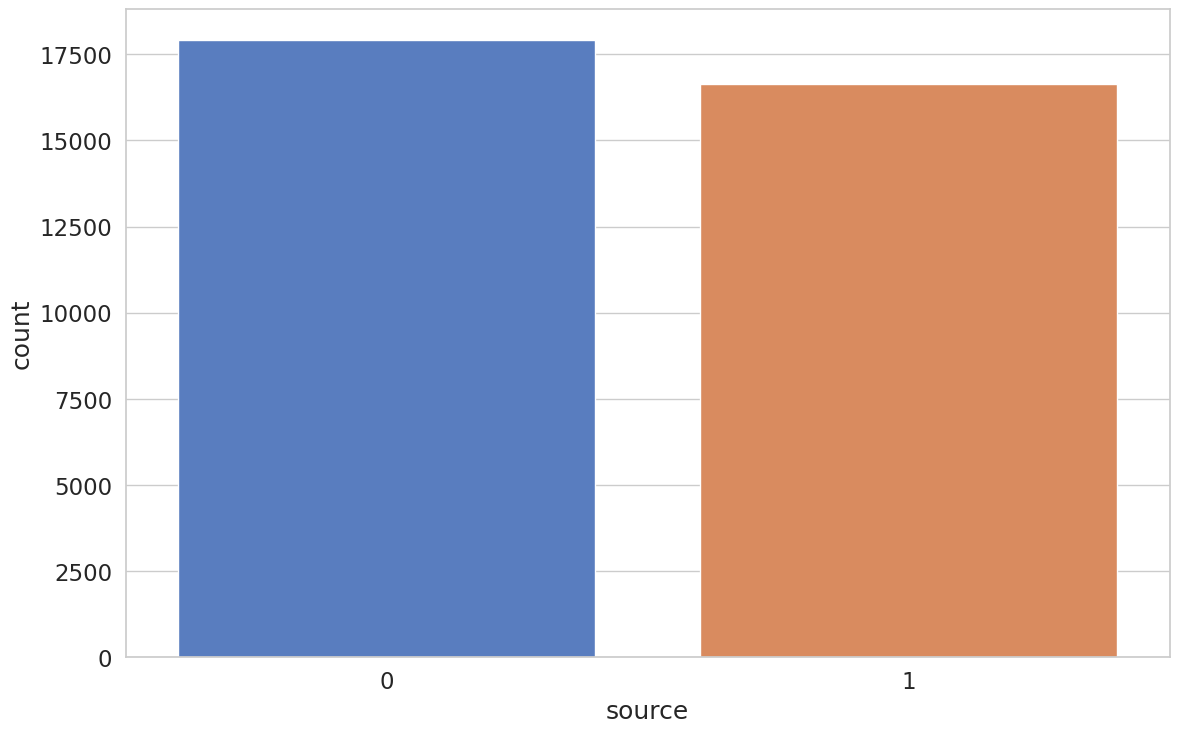

In [ ]:
sns.countplot(x='source',data=df)
plt.show()

In [ ]:
grouped = df.groupby('source').agg({'inter_api_access_duration(sec)':['mean', 'std', min, max],
                                    'api_access_uniqueness':['mean', 'std', min, max],
                                      'sequence_length(count)':['mean', 'std', min, max],
                                      'vsession_duration(min)':['mean', 'std', min, max],
                                       'ip_type':['mean', 'std', min, max],
                                       'behavior':['mean', 'std', min, max],
                                       'behavior_type':['mean', 'std', min, max],
                                       'num_sessions':['mean', 'std', min, max],
                                     'num_users':['mean', 'std', min, max],
                                     'num_unique_apis':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

<ipython-input-15-551bc9ab1e81>:12: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]


,inter_api_access_duration(sec)_mean,inter_api_access_duration(sec)_std,inter_api_access_duration(sec)_min,inter_api_access_duration(sec)_max,api_access_uniqueness_mean,api_access_uniqueness_std,api_access_uniqueness_min,api_access_uniqueness_max,sequence_length(count)_mean,sequence_length(count)_std,...,num_sessions_min,num_sessions_max,num_users_mean,num_users_std,num_users_min,num_users_max,num_unique_apis_mean,num_unique_apis_std,num_unique_apis_min,num_unique_apis_max
source,,,,,,,,,,,,,,,,,,,,,
0,13.742644,56.662352,0.00001,2333.627333,0.477938,0.294700,0.000714,1.0,95.504177,191.921124,...,1.0,1462.0,1.865238,9.160005,1.0,219.0,18.964383,17.971979,1.0,178.0
1,27.779306,94.983100,0.00000,1527.227000,0.408034,0.306003,0.000714,1.0,32.774527,79.443045,...,1.0,300.0,5.478010,11.485639,1.0,99.0,11.729512,10.728324,1.0,95.0


<ipython-input-16-16dccdc72eeb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.source == 0], bins=50)
<ipython-input-16-16dccdc72eeb>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.source == 1], bins=50)
<ipython-input-16-16dccdc72eeb>:7: UserWarning: 

`distplot` is a de

<Figure size 1200x800 with 0 Axes>

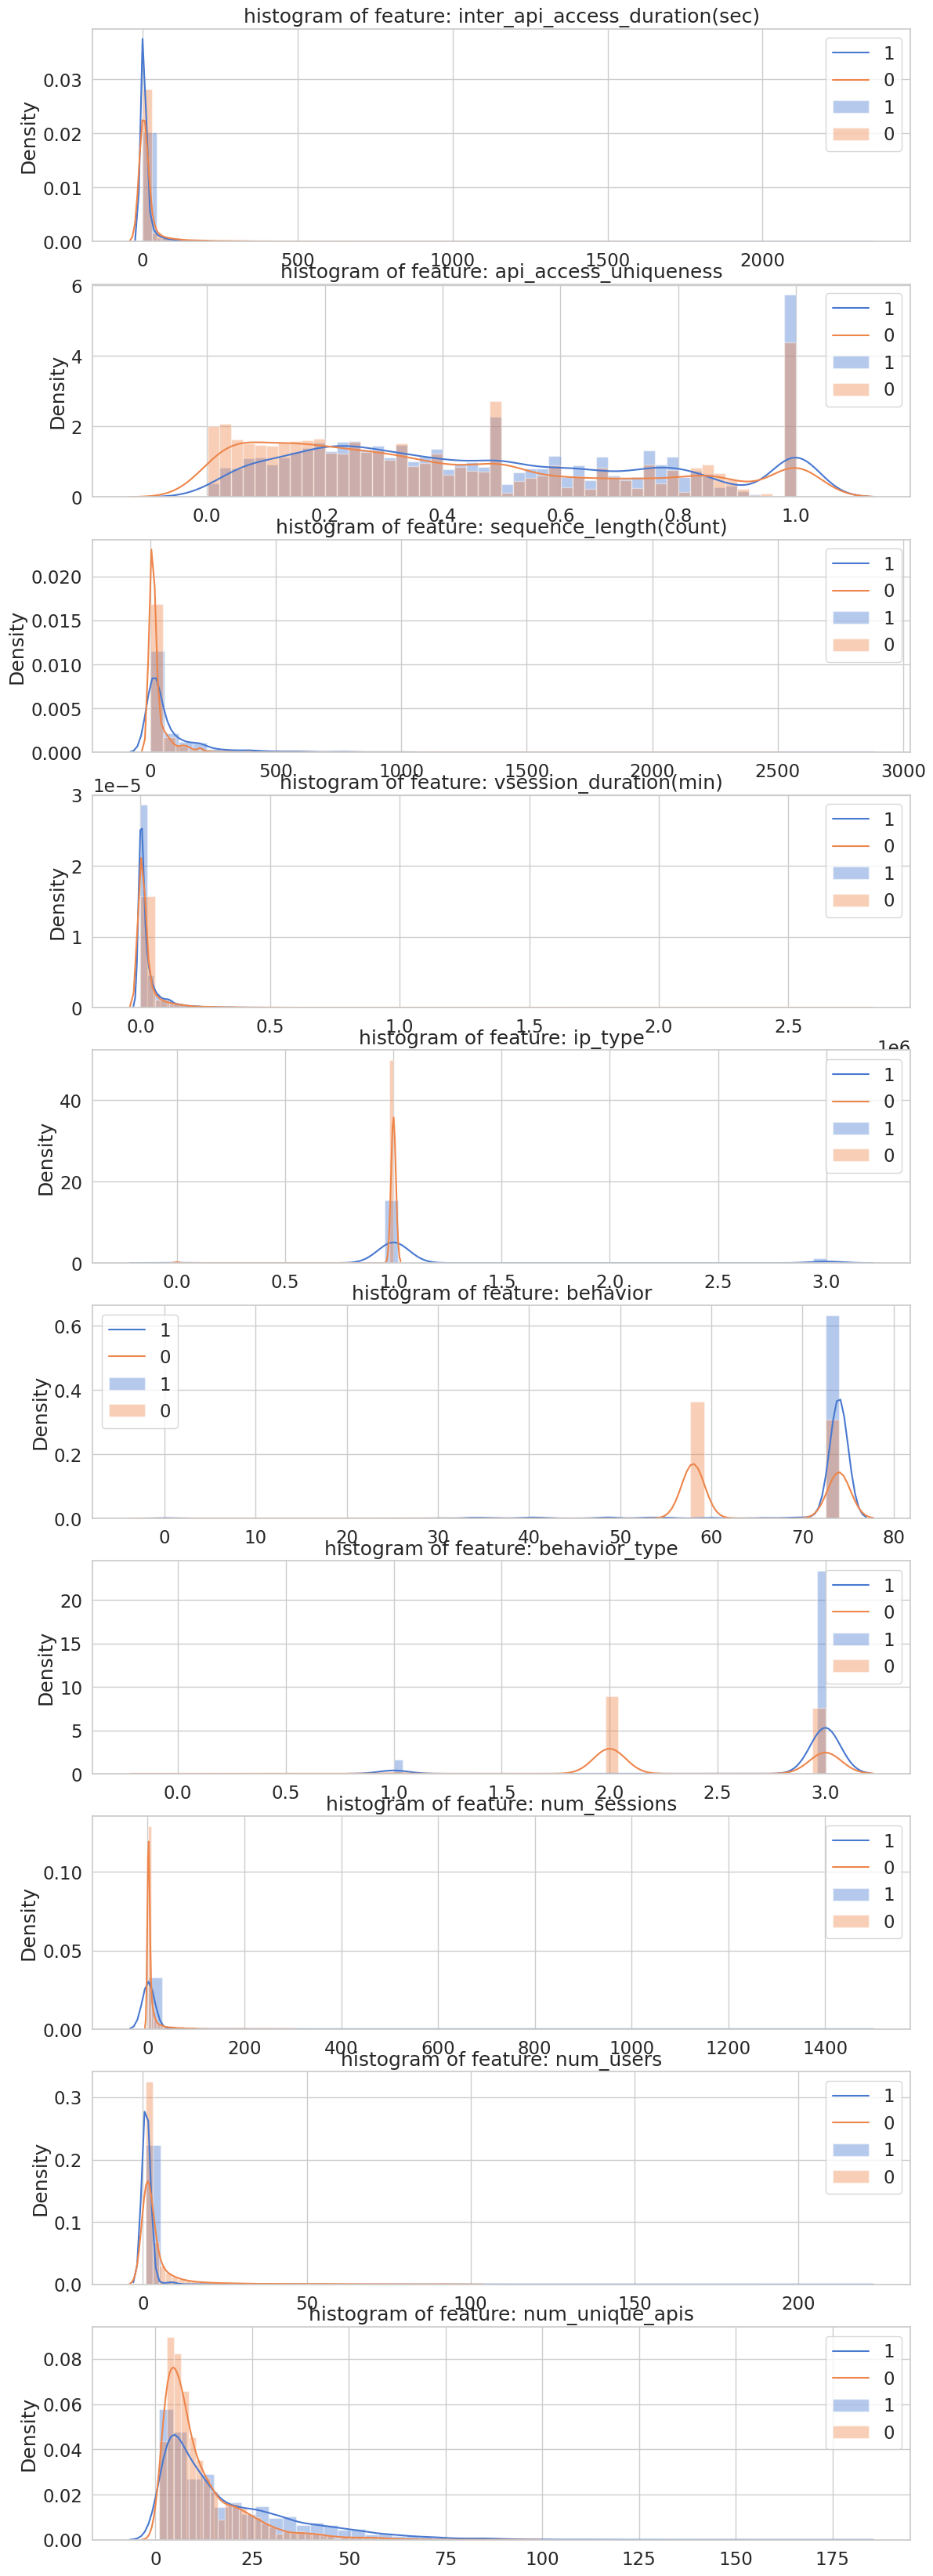

In [ ]:
plt.subplots_adjust(top=5)
columns=df.columns[:10]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.source == 0], bins=50)
    sns.distplot(df[cn][df.source == 1], bins=50)
    ax.set_xlabel('')
    plt.legend(['1','0','1','0'])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

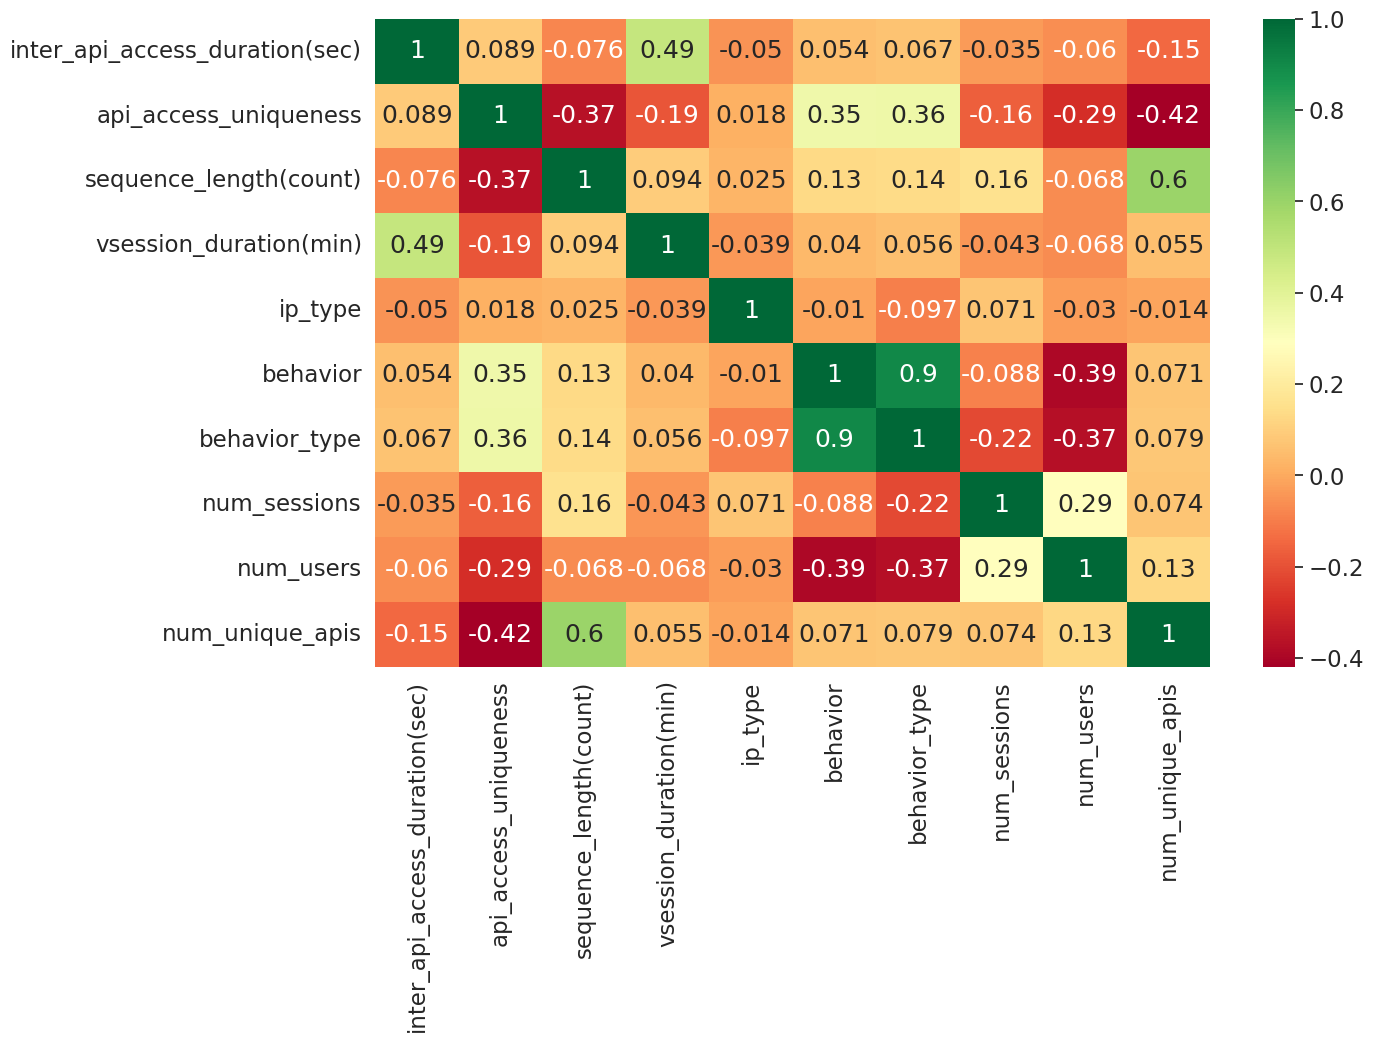

In [ ]:
sns.heatmap(df[df.columns[:10]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# **Model Building**

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Methods for evaluating the performance of a Classifier**


## **Holdout Method**

In [ ]:
outcome=df['source']
data=df[df.columns[:10]]

train,test = train_test_split(df,test_size=0.35,random_state=0,stratify=df['source'])# stratify the outcome

train_X=train[train.columns[:10]]
test_X=test[test.columns[:10]]
train_Y=train['source']
test_Y=test['source']

In [ ]:
print(train_X.shape)
print(test_X.shape)

(22462, 10)
(12095, 10)


### **Feature Centering and Scaling**

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.


In [ ]:
features = train_X.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

### **Compare model accuracies**

In [ ]:
accuracy_scores=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction,test_Y))

models_dataframe=pd.DataFrame(accuracy_scores,index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=False)

,Accuracy
Random forest,0.850434
Decision Tree,0.830178
KNN,0.826623
Radial Svm,0.801571
Linear Svm,0.767921
Logistic Regression,0.765110
Naive Bayes,0.612981


In [ ]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

inter_api_access_duration(sec)    0.172836
vsession_duration(min)            0.154769
behavior                          0.154074
behavior_type                     0.109649
num_unique_apis                   0.088605
sequence_length(count)            0.086627
num_users                         0.081724
api_access_uniqueness             0.079163
num_sessions                      0.060149
ip_type                           0.012403
dtype: float64

In [ ]:
df.head(3)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1,74,3,1.0,1.0,11.0,0


In [ ]:
df.drop(df.columns[1],axis=1,inplace=True)#api_access_uniqueness

In [ ]:
df.head(3)

,inter_api_access_duration(sec),sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,40.0,62066,1,74,3,1.0,1.0,11.0,0


In [ ]:
df.drop(df.columns[3],axis=1,inplace=True)#ip_type

In [ ]:
df.head(3)

,inter_api_access_duration(sec),sequence_length(count),vsession_duration(min),behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,31.0,13040,74,3,1.0,1.0,13.0,0
1,51.419393,107.0,330113,74,3,1.0,1.0,27.0,0
2,25.860775,40.0,62066,74,3,1.0,1.0,11.0,0


In [ ]:
df.drop(df.columns[5],axis=1,inplace=True)#num_sessions

In [ ]:
df.head(3)

,inter_api_access_duration(sec),sequence_length(count),vsession_duration(min),behavior,behavior_type,num_users,num_unique_apis,source
0,7.010387,31.0,13040,74,3,1.0,13.0,0
1,51.419393,107.0,330113,74,3,1.0,27.0,0
2,25.860775,40.0,62066,74,3,1.0,11.0,0


In [ ]:
df.drop(df.columns[1],axis=1,inplace=True)#num_sessions

In [ ]:
df.head(3)

,inter_api_access_duration(sec),vsession_duration(min),behavior,behavior_type,num_users,num_unique_apis,source
0,7.010387,13040,74,3,1.0,13.0,0
1,51.419393,330113,74,3,1.0,27.0,0
2,25.860775,62066,74,3,1.0,11.0,0


In [ ]:
df.drop(df.columns[4],axis=1,inplace=True)#num_sessions

In [ ]:
df.drop(df.columns[4],axis=1,inplace=True)#num_sessions

In [ ]:
df.head(3)

,inter_api_access_duration(sec),vsession_duration(min),behavior,behavior_type,source
0,7.010387,13040,74,3,0
1,51.419393,330113,74,3,0
2,25.860775,62066,74,3,0


## **k-fold Cross validation**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [ ]:
# Starting with the original dataset and then doing centering and scaling
features=df[df.columns[:3]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['inter_api_access_duration(sec)''vsession_duration(min)',
                                         'behavior', 'behavior_type'])
X['source']=df['source']

In [ ]:
nan_values = X['source'].isnull().sum()
print("Number of NaN values in 'source' column:", nan_values)

Number of NaN values in 'source' column: 5


In [ ]:
X['source'].fillna(X['source'].mean(), inplace=True)  # Example: Filling NaN with mean


In [ ]:
X.dropna(subset=['source'], inplace=True)


In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:3]], X['source'], cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=False)

ValueError: ignored

# **Comparing data mining methods**

In [ ]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

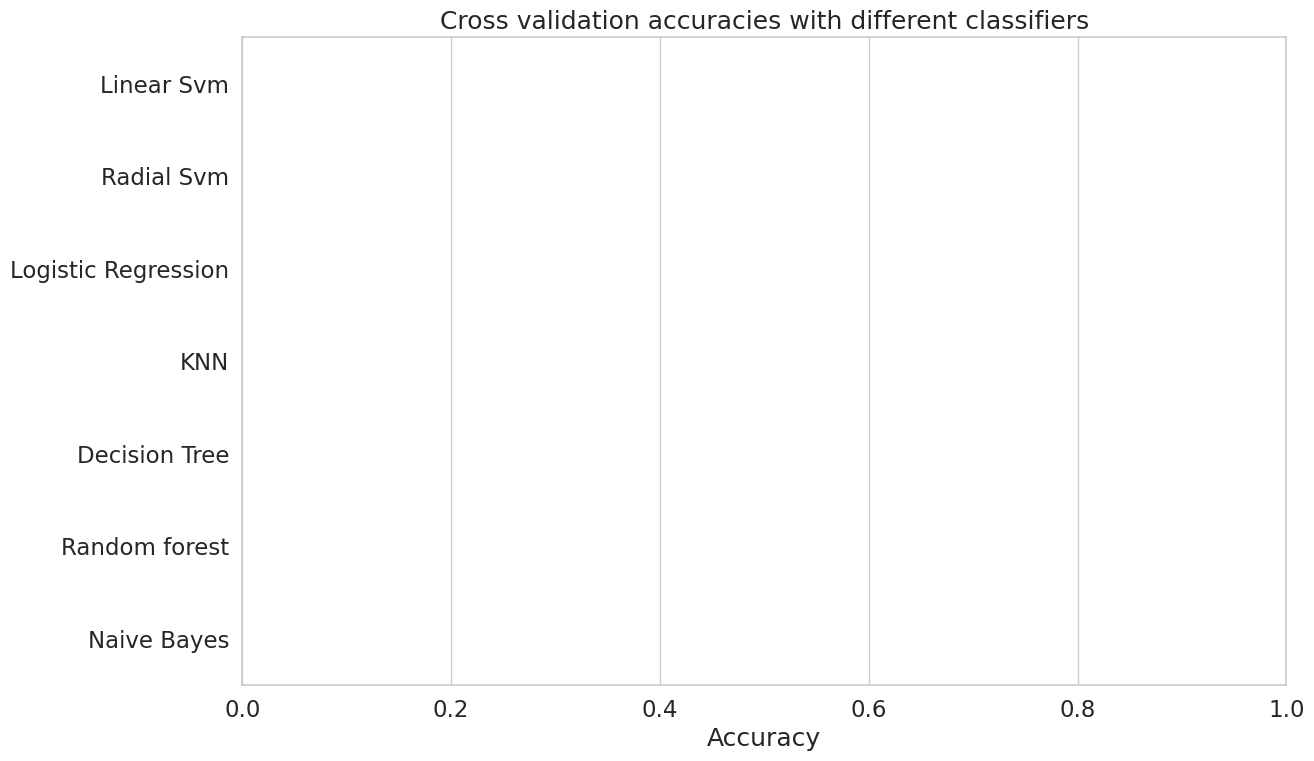

In [ ]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

# **Ensembling**

In [ ]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [ ]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

## **Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Log Reg**

In [ ]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)],
                                            voting='soft', weights=[3,1,2])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [ ]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.7726


# **ROC curve with AUC**

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### **For the ensembling method**

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, predictEnsemble)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7665249057094551

Text(0.5, 0, 'False Positive Rate')

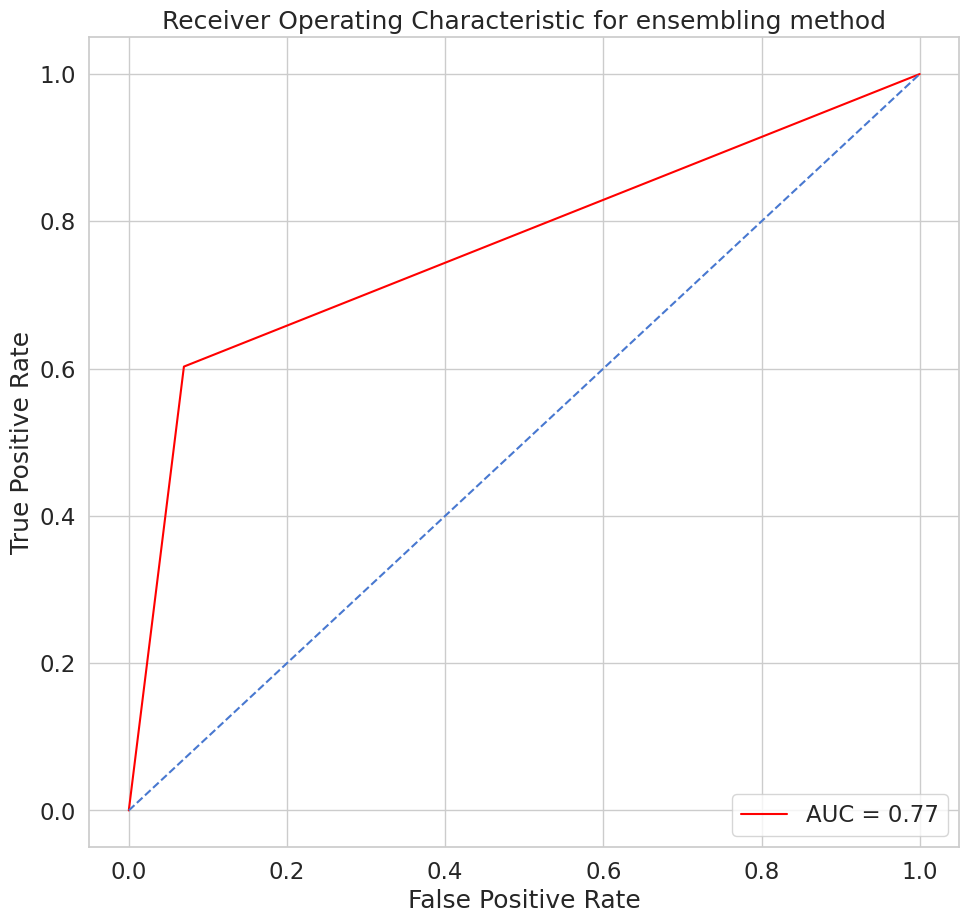

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for ensembling method')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **For all methods**

In [ ]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

# Ensemble
y_pred_prob_en = ensembleModel.predict_proba(test_X)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(test_Y, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(test_Y, y_pred_prob_en)

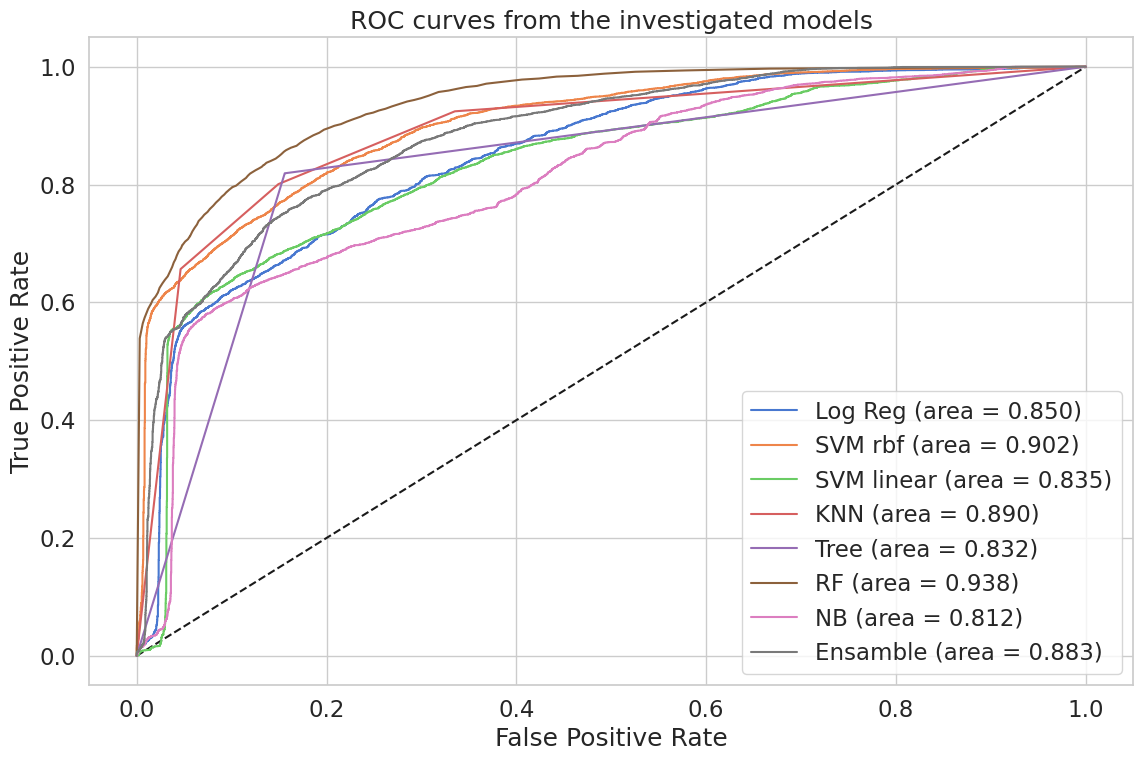

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

## **Precision-recall curve comparing the models**

Information retrieval researchers define parameters called *recall* and *precision*:
\begin{equation*}
    \begin{split}
        {recall} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are relevant}}\\
        {precision} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are retrieved }}
    \end{split}
\end{equation*}


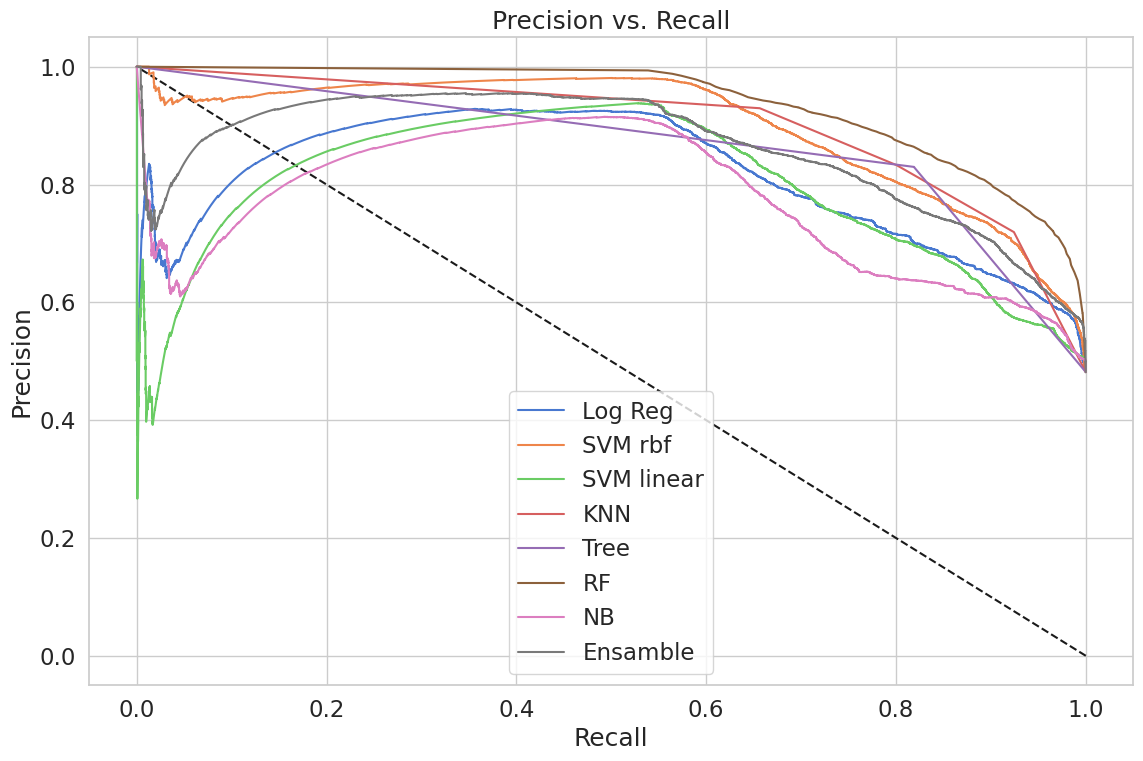

In [ ]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_en, precision_en, label='Ensamble')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# **Predictive Outcomes**

## **Confusion matrix with ensemble model**



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

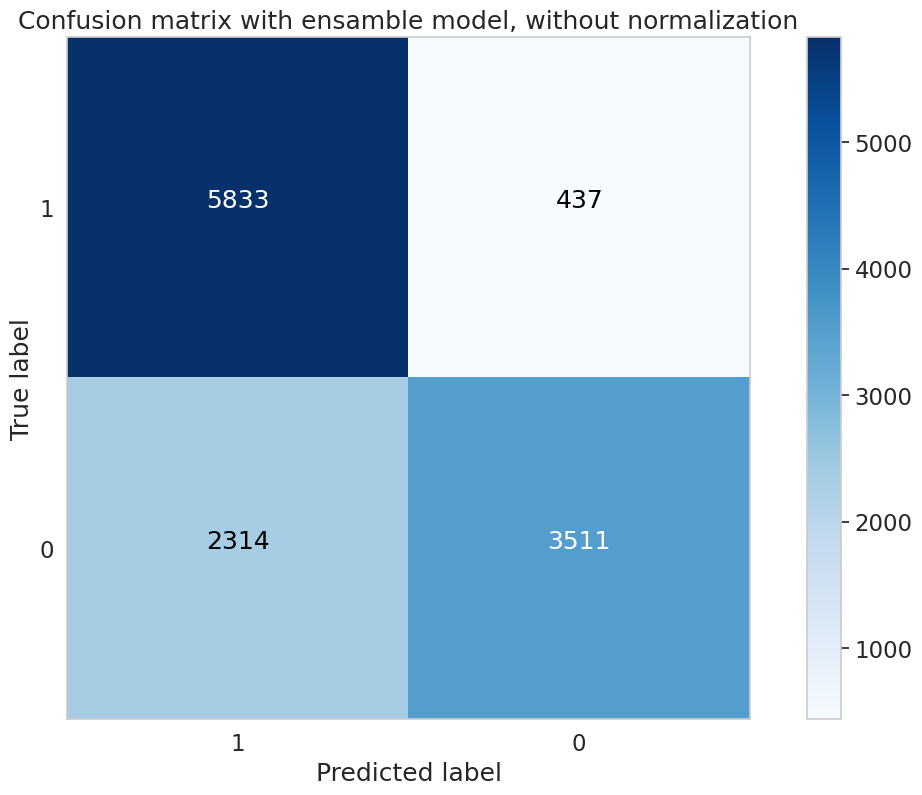

In [ ]:
class_names = test_Y.unique()
cmEnsamble = confusion_matrix(test_Y, predictEnsemble)
plt.grid(False)
plot_confusion_matrix(cmEnsamble, classes=class_names, title='Confusion matrix with ensamble model, without normalization')


## **Classification Report**

In [ ]:
print(metrics.classification_report(test_Y, predictEnsemble))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      6270
           1       0.89      0.60      0.72      5825

    accuracy                           0.77     12095
   macro avg       0.80      0.77      0.76     12095
weighted avg       0.80      0.77      0.77     12095



# **Cost-sensitive learning**

## **prediction using Neural Network with Keras**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(42)

In [ ]:
train_Y = to_categorical(train_Y, num_classes = 2)
test_Y = to_categorical(test_Y, num_classes = 2)

In [ ]:
# Confirm the train-test split ratio
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))

(22462, 10)
(22462, 2)
(12095, 10)
(12095, 2)


## **1. Create the model using Keras**



In [ ]:
# A regularizer that applies a L2 regularization penalty.
# The L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x))
# Try the model with and without the regularizer
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
#model.add(Dense(2, activation='sigmoid'))

model.add(Dense(2,kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4), activation='sigmoid'))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Adding a Dense layer with L2 regularization
model.add(Dense(2, kernel_regularizer=regularizers.l2(1e-4), activation='sigmoid'))

# Compile your model and proceed with training
# For example:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


In [ ]:
model.summary()# 548 unique weight create

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 12)                132       
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 548 (2.14 KB)
Trainable params: 548 (2.1

## **2. Compile the model**




In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **3. Fit model**




In [ ]:
epoch = 50
batch_size = 10 #no of sampledata nibo

history = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epoch,
          validation_data = (test_X, test_Y), verbose = 2)

Epoch 1/50
2247/2247 - 9s - loss: 0.4279 - accuracy: 0.7855 - val_loss: 0.3755 - val_accuracy: 0.7983 - 9s/epoch - 4ms/step
Epoch 2/50
2247/2247 - 9s - loss: 0.3688 - accuracy: 0.8042 - val_loss: 0.3654 - val_accuracy: 0.8000 - 9s/epoch - 4ms/step
Epoch 3/50
2247/2247 - 7s - loss: 0.3601 - accuracy: 0.8100 - val_loss: 0.3597 - val_accuracy: 0.8085 - 7s/epoch - 3ms/step
Epoch 4/50
2247/2247 - 9s - loss: 0.3534 - accuracy: 0.8128 - val_loss: 0.3556 - val_accuracy: 0.8097 - 9s/epoch - 4ms/step
Epoch 5/50
2247/2247 - 7s - loss: 0.3509 - accuracy: 0.8160 - val_loss: 0.3518 - val_accuracy: 0.8112 - 7s/epoch - 3ms/step
Epoch 6/50
2247/2247 - 8s - loss: 0.3480 - accuracy: 0.8181 - val_loss: 0.3508 - val_accuracy: 0.8127 - 8s/epoch - 4ms/step
Epoch 7/50
2247/2247 - 6s - loss: 0.3461 - accuracy: 0.8202 - val_loss: 0.3478 - val_accuracy: 0.8207 - 6s/epoch - 3ms/step
Epoch 8/50
2247/2247 - 7s - loss: 0.3435 - accuracy: 0.8207 - val_loss: 0.3501 - val_accuracy: 0.8165 - 7s/epoch - 3ms/step
Epoch 9/

## **4. Evaluate model**

We evaluate the model on test dataset and obtain the score and accuracy.
Score is the evaluation of the loss function for a given input.


In [ ]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

378/378 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8309
Test score: 0.32073476910591125
Test accuracy: 0.8309218883514404


### **Training and validation curves vs. epoch**

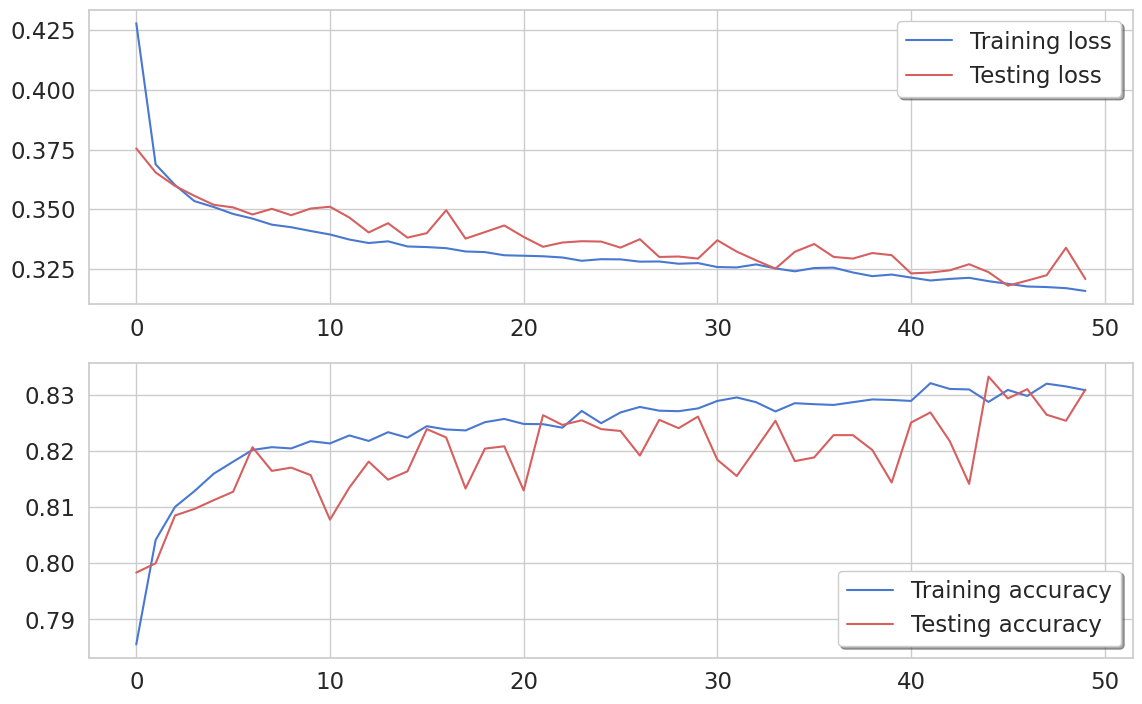

In [ ]:
# Plot the loss and accuracy curves for training and validation vs. epochs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

#overfitting(minmum loss er theke bere gese)

### **Confusion matrix using this model**

Let us have a look at the correct and misclasssification in the confusion matrix.
I am using the below function for confusion matrix.

378/378 [==============================] - 1s 2ms/step


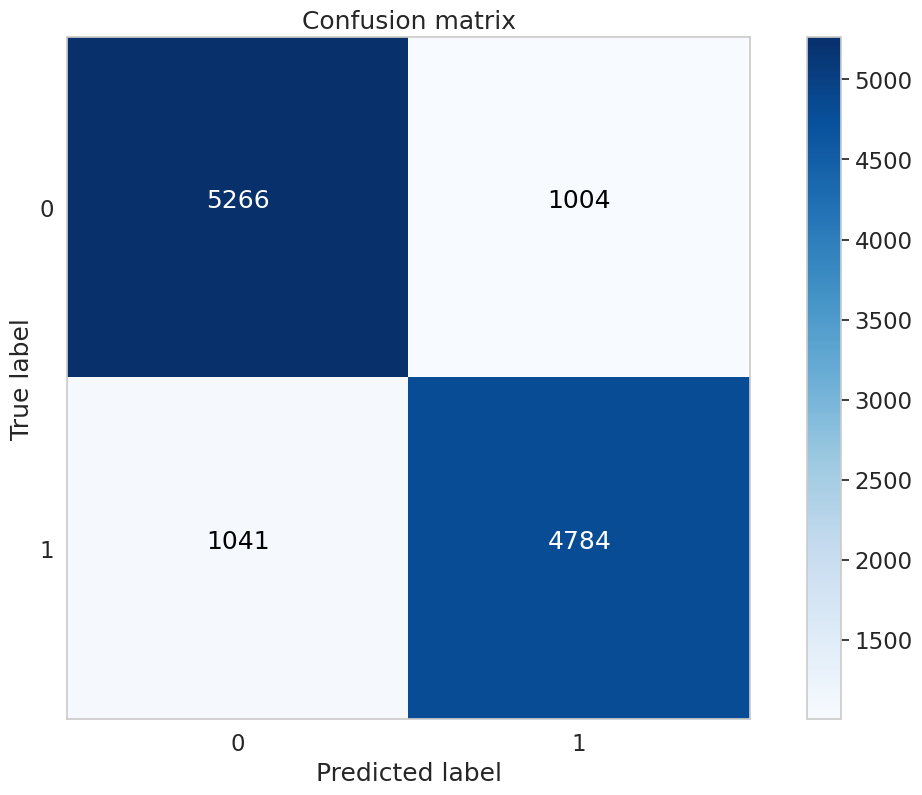

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.grid(False)
plt.show()